### This jupyter notebook is to calculate the angles for the ordered parameter Zr-Ooh-Zr (Coordinates are in data.RoggeUiO-66 for rigid framework)
I want to calculate the dihedral angles for the NVT MD empty flexible MOF for Zr-Ooh-Zr (type 11). 


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase import Atoms
from ase.io import read, write
import numpy as np
import ase.io.lammpsrun

Path directory for empty flexible UiO-66 framework: /bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/moredump-every1000/emptyUiO-66-77K

First read "data.RoggeUiO66" file to count how many number of angles of type 11 are there with the atom numbers and save their coordinates in a list
To form type 6 dihedral, framework atom numbers are 

In [13]:
fr = read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/moredump-every1000/emptyUiO-66-77K/data.RoggeUiO66', format='lammps-data')
angle_big_list=[]
with open('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/moredump-every1000/emptyUiO-66-77K/data.RoggeUiO66','r') as f:  ## To find dihedral angles for rigid UiO-66
    data = f.readlines()[8478:15774]
    print("Total number of angles: ",len(data))
    count = 0
    angle_count = 0 
    for lines in data:
        l_split = lines.split()
        if l_split[1] == '11':
            angle_big_list.append([int(int(l_split[2])-1), int(int(l_split[3])-1), int(int(l_split[4])-1)]) # indices of atoms to find dihedral starting from 0
            ang = fr.get_angle(int(int(l_split[2])-1), int(int(l_split[3])-1), int(int(l_split[4])-1))  # -1 since lammps starts from 1
            print(ang)
            count+=1
    print('Total number of angles of type 11: ',count)
    print(angle_big_list)
#     print(dih)
   
            
        
        

Total number of angles:  7296
5.0443641033995545
5.0443641033996265
102.76213641175627
102.76212331401354
5.044366098410965
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76213641175627
5.044366098410965
102.76211021626528
102.76211021626527
43.52961546001885
102.76213641175627
102.76212331401354
5.044366098410965
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76213641175627
5.044366098410965
5.0443641033995545
102.76212331401354
102.76213641175627
5.044366098410965
102.76212331401354
102.76212331401354
102.76211021626528
102.76211021626527
102.76212331401354
102.76213641175627
5.044366098410965
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76211021626527
102.76211021626527
43.52961546001885
43.52961546001885
102.76212331401354
102.76212331401354
102.76212331401354
102.76212331401354
102.76211021626527
5.044363106348462
102.7621404834132
102.76216205

#### Now in order to do get dihedral angles from the dump lammps file taking into account the periodic boundary condition, convert dump.lammpstrj to XDATCAR file and sort the atom indices in increasing order using sump2xdatcar-sort.py script and then use ase .get_dihedral() to get the dihedral angles

Use command python dump2xdatcar-sort.py dumpFramework.production.lammpstrj XDATCAR

In [14]:
global_ang_zero = []
global_ang_7_IPA = []
global_ang_7_acetone = []
global_ang_23_N2 = []
for j in range(0,21):
    a0=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/0loading-emptyUiO-66/XDATCAR',index=j)
    a7=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/7loadedIPA-UiO-66/dump2xdatcar/XDATCAR',index=j)
    a7_acetone=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/7loadedacetone-UiO-66/dump2xdatcar/XDATCAR',index=j)
    a23_N2=read('/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/NVT-MD-all/23loaded_N2_Rogge-UiO-66/dump2xdatcar/XDATCAR',index=j)
    for i in range(len(angle_big_list)):
        b=list(angle_big_list[i])
        c0 = a0.get_angle(*b)
        c7 = a7.get_angle(*b)
        c7_acetone=a7_acetone.get_angle(*b)
        c23_N2 = a23_N2.get_angle(*b)
        global_ang_zero += [c0]
        global_ang_7_IPA += [c7]
        global_ang_7_acetone+=[c7_acetone]
        global_ang_23_N2+=[c23_N2]
    print(f'{j+1} snapshot angles calculated.... Going to snapshot {j+2}')
    
    


    

1 snapshot angles calculated.... Going to snapshot 2
2 snapshot angles calculated.... Going to snapshot 3
3 snapshot angles calculated.... Going to snapshot 4
4 snapshot angles calculated.... Going to snapshot 5
5 snapshot angles calculated.... Going to snapshot 6
6 snapshot angles calculated.... Going to snapshot 7
7 snapshot angles calculated.... Going to snapshot 8
8 snapshot angles calculated.... Going to snapshot 9
9 snapshot angles calculated.... Going to snapshot 10
10 snapshot angles calculated.... Going to snapshot 11
11 snapshot angles calculated.... Going to snapshot 12
12 snapshot angles calculated.... Going to snapshot 13
13 snapshot angles calculated.... Going to snapshot 14
14 snapshot angles calculated.... Going to snapshot 15
15 snapshot angles calculated.... Going to snapshot 16
16 snapshot angles calculated.... Going to snapshot 17
17 snapshot angles calculated.... Going to snapshot 18
18 snapshot angles calculated.... Going to snapshot 19
19 snapshot angles calculat

In [15]:
global_angle_zero_77K=[]
l = 0
with open('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/Angles/Type-11/empty-77K-Type11-angle.txt') as f:
    data=f.readlines()
    for lines in data:
        l_split=lines.split()
        global_angle_zero_77K += [float(l_split[0])]

0


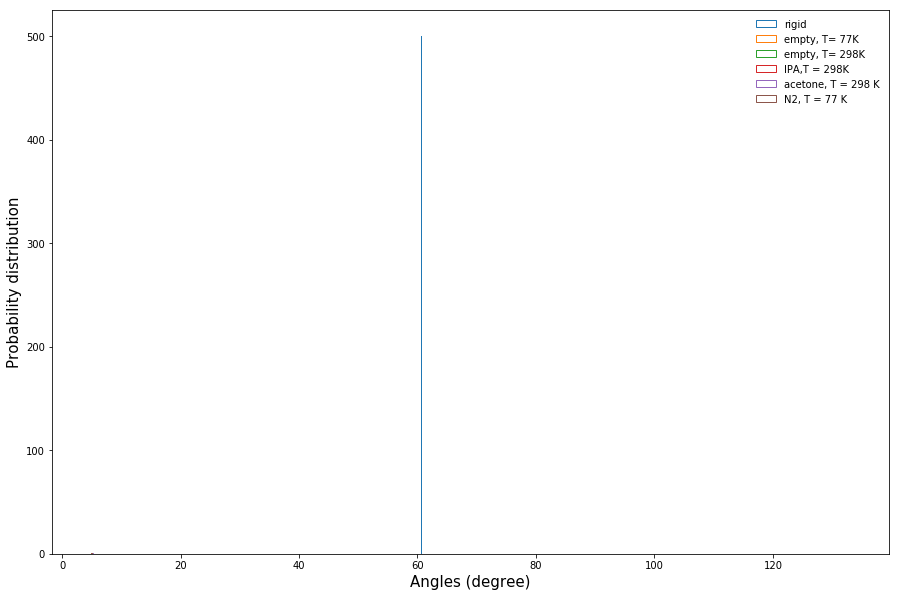

In [29]:
plt.figure(figsize=(15,10))
bins=500
plt.hist(ang,bins=bins,histtype='step', linewidth=1,label='rigid',density=True)
plt.hist(global_angle_zero_77K,bins=bins,histtype='step', linewidth=1,label='empty, T= 77K',density=True)
plt.hist(global_ang_zero,bins=bins,histtype='step', linewidth=1,label='empty, T= 298K',density=True)
plt.hist(global_ang_7_IPA,bins=bins,histtype='step', linewidth=1,label='IPA,T = 298K',density=True)
plt.hist(global_ang_7_acetone,bins=bins,histtype='step', linewidth=1,label='acetone, T = 298 K',density=True)
plt.hist(global_ang_23_N2,bins=bins,histtype='step', linewidth=1,label='N2, T = 77 K',density=True)
plt.legend(frameon=False,bbox_to_anchor=(1,1))
plt.ylabel('Probability distribution',size=15)
plt.xlabel('Angles (degree)',size=15)
# ?plt.hist()
print(len(global_ang_23_N2)-(384*21))

Text(0.5,0,'Angles (degree)')

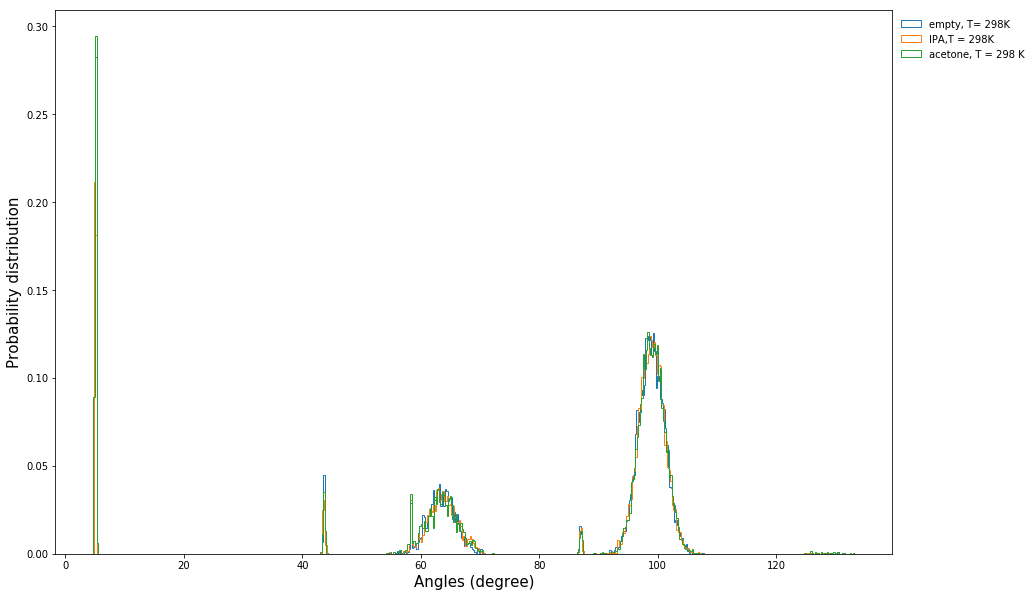

In [28]:
plt.figure(figsize=(15,10))
bins=500
# plt.hist(global_angle_zero_77K,bins=bins,histtype='step', linewidth=3,label='empty, T= 77K',density=True)

plt.hist(global_ang_zero,bins=bins,histtype='step', linewidth=1,label='empty, T= 298K',density=True)
plt.hist(global_ang_7_IPA,bins=bins,histtype='step', linewidth=1,label='IPA,T = 298K',density=True)
plt.hist(global_ang_7_acetone,bins=bins,histtype='step', linewidth=1,label='acetone, T = 298 K',density=True)
# plt.hist(global_ang_23_N2,bins=bins,histtype='step', linewidth=3,label='N2, T = 77 K',density=True)
plt.legend(frameon=False,bbox_to_anchor=(1,1))
plt.ylabel('Probability distribution',size=15)
plt.xlabel('Angles (degree)',size=15)